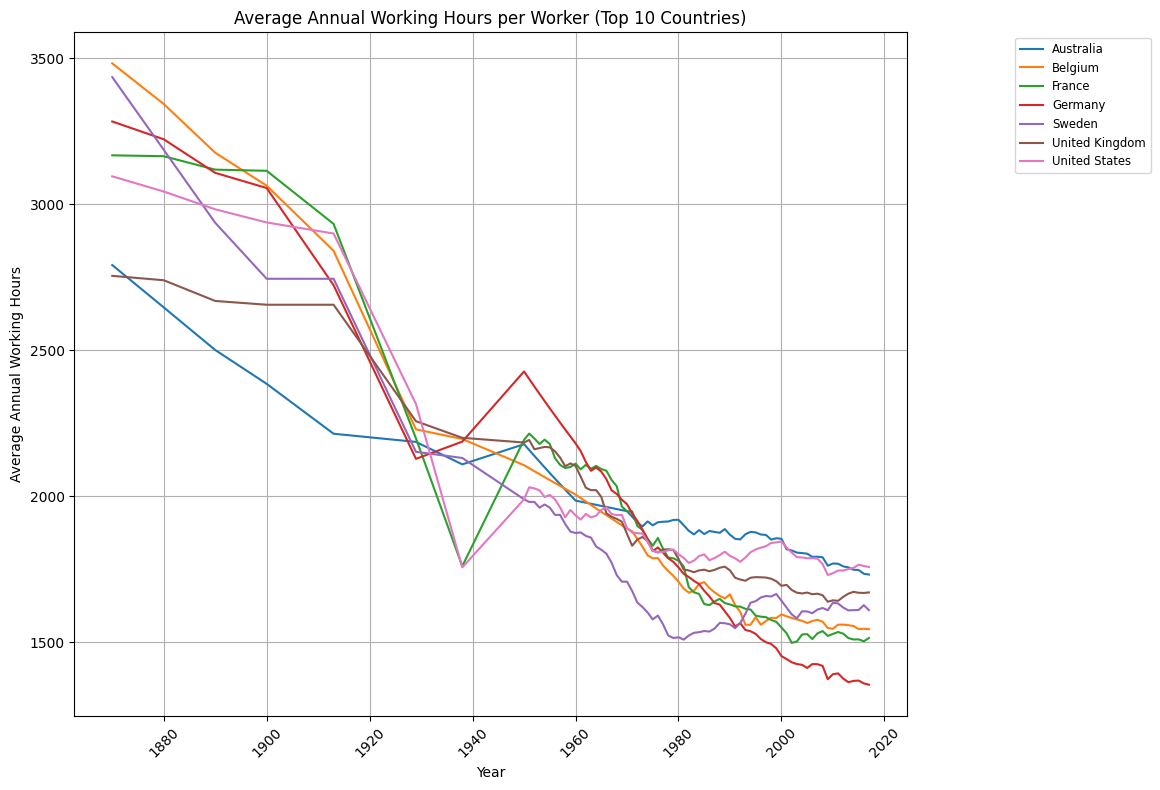

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/annual-working-hours-per-worker.csv')

# Convert 'Year' and 'Average annual working hours per worker' to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Average annual working hours per worker'] = pd.to_numeric(df['Average annual working hours per worker'], errors='coerce')

# Aggregate by Entity to find the top 10 countries with the most data points
top_countries = (
    df.groupby('Entity')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the data for these top 10 countries
filtered_df = df[df['Entity'].isin(top_countries)]

# Create a figure
plt.figure(figsize=(12, 8))

# Plot each country
for entity in top_countries:
    country_data = filtered_df[filtered_df['Entity'] == entity]
    plt.plot(
        country_data['Year'],
        country_data['Average annual working hours per worker'],
        label=entity,
        linewidth=1.5
    )

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=1, fontsize='small')

# Beautify the plot
plt.title('Average Annual Working Hours per Worker (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Average Annual Working Hours')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Convert 'Average annual working hours per worker' to numeric
df['Average annual working hours per worker'] = pd.to_numeric(df['Average annual working hours per worker'], errors='coerce')

# Group by 'Entity' and find the maximum working hours for each country
country_max_hours = df.groupby('Entity')['Average annual working hours per worker'].max()

# Find the country with the highest maximum working hours
max_hours_country = country_max_hours.idxmax()
max_hours_value = country_max_hours.max()

print(f"The country with the most annual working hours is {max_hours_country} with {max_hours_value} hours.")

The country with the most annual working hours is Belgium with 3483.0 hours.
